In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


b'Hello, TensorFlow!'


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<p>Ejemplo de red neuronal con 2 capas y funcion de salida $ g(x) $ Sigmoide (o funcion de regresion logística) </p>
<p>Ejemplo con el conjunto de información definido por las notas de la clase RedesNeuronales17Eng.pdf</p>

In [3]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

<p>En esta parte se declara :</p>
1. El numero de neuronas en la capa de inicio
2. El numero de elementos en el conjunto de salida
3. Los inputs necesarios para el calculo

In [4]:
?tf.random_uniform([input_size,output_layer_size], -1, 1)

In [5]:
input_size=2
output_layer_size=1
#Los tf.placeholders son para los datos de entrada
x = tf.placeholder(tf.float32,[None,input_size])
y_ = tf.placeholder(tf.float32,[None,output_layer_size])
#La variable para la que se va a ir recalculando
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size],-1,1), name="W_layer1")
b_layer1=tf.Variable(tf.zeros([output_layer_size]), name="b_layer")

Funcion de transferencia de tipo Sigmoide que recibe como entrada  el producto de la proyección lineal con los pesos iniciales y los va actualizando

In [6]:
y=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)

Funcion de pérdida

In [7]:
lossfn=tf.reduce_mean(tf.reduce_sum(y_-y)**2)

Funcion de Entrenamiento

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

Inicializa las variables y la sesion 

In [9]:
init = tf.initialize_all_variables()
sess=tf.Session()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Activando la session de TensorFlow para hacer el entrenamiento

In [10]:
sess.run(init)
for i in range(5000):
    sess.run(train_step,feed_dict={x:X,y_:Y})

In [11]:
print(sess.run(y,feed_dict={x:[[0.8,0.5]]}))

[[ 0.26863825]]


In [12]:
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.39634934]
 [-0.44139951]]


Más defiiniciones Perdiccion 

Cuantificando el error

In [13]:
correct_prediction = tf.equal(tf.round(y),y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
print(sess.run(accuracy,feed_dict={x:X,y_:Y}))

0.75


Vizualizando la Barrera de Decisión. Para ello es necesario extraer las w's del grafo de Tensorflow

In [15]:
w=[sess.run(b_layer1,feed_dict={x:X,y_:Y})[0]]+[i[0] for i in sess.run(W_layer1,feed_dict={x:X,y_:Y})]

<p>Usemos los pesos para predecir el valro del la linea clasificadora (nota.- los pesos son los que fueron entrenados con la red neuronal en tensorflow)</p>
<p> $ w^{T}*X = B \Rightarrow ^{} w_{0}+w_{1}x_{1}^{i}+w_{2}x_{2}^{i}=B \Rightarrow ^{}  \overbrace{w_{0}} +w_{1}x_{1}^{i}+w_{2}x_{2}^{i}=0  $ </p>
<p> Por lo que la ecuacion anterior define la Barrera de Decision. Y su ordenada y coordenada al origen corresonpen a:</p>
$$ X_{1} =  - \frac{\overbrace{w_{0}}+w_{2}x_{2}^{i}}{w_{1}}     $$
<p> y </p>
$$ X_{2} = - \frac{\overbrace{w_{0}}+w_{1}x_{1}^{i}}{w_{2}} $$
<p> Por lo tanto : </p>
$$ x_{1}= 0  \Rightarrow ^{} (0,- \frac{\overbrace{w_{0}}}{w_{1}} ) $$
<p> y </p>
$$ x_{2}= 0  \Rightarrow ^{} (- \frac{\overbrace{w_{0}}}{w_{2}}, 0) $$
<p> Por último la pendiente es igual a : </p>
$$ m = \frac{\partial x_{2} }{\partial x_{1}} =  - \frac{w_{1}}{w_{2}} $$

<p>Ahora podemos definir a la recta que pasa por los puntos: $  (0,- \frac{\overbrace{w_{0}}}{w_{1}} ) $, $   (- \frac{\overbrace{w_{0}}}{w_{2}}, 0)  $ y que tiene pendiente $ m = - \frac{\overbrace{w_{1}}}{w_{2}} $, usando los resultados anteriores $x_{1}=0 $ y $ x_{2}= - \frac{w_{0}}{w_{2}}$: </p>
$$ \Rightarrow ^{}  x_{2} - \frac{w_{0}}{w_{2}} = m(x_{1}-0 )    $$
$$   \Rightarrow ^{}   x_{2} =   - \frac{w_{1}}{w_{2}}x_{1}  +\frac{\overbrace{w_{0}}}{w_{2}}                    $$


In [16]:
#Calculamos la pendiente
m=-w[1]/w[2]
print("La pendiente m es igual a :")
m

La pendiente m es igual a :


0.89793789

In [17]:
print("La ordenada al origen a  es igual a ")
w[0]/w[2]

La ordenada al origen a  es igual a 


2.4873664

In [18]:
print("El punto faltante :")
(0,-w[0]/w[1])

El punto faltante :


(0, 2.7700875)

In [19]:
print("El punto faltante :")
(-w[0]/w[2],0)

El punto faltante :


(-2.4873664, 0)

(-5.2, 5.2)

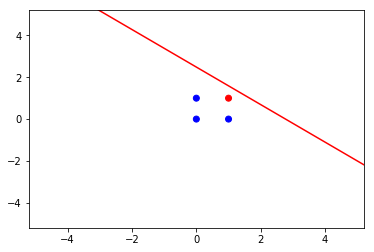

In [21]:
plt.scatter(X[:,0],X[:,1],c=['red' if i == 1 else 'blue' for i in Y])
x1=np.linspace(-5.2,5.2,100)
plt.plot(x1,+w[0]/w[2]-m*x1,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [22]:
?np.linspace

In [23]:
sess.close()

Funcion XOR
Clasificador basado en redes neuronales

In [26]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])
        
Colors=np.asarray(rok)

In [48]:
input_size=2
middle_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

In [49]:
y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
lossfn=tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #Funcion de error
train_step=tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)


In [50]:
init = tf.global_variables_initializer()
sess = tf.Session() #tipo de sucecion


In [51]:
sess.run(init)
for i in range(50000):
    sess.run(train_step,feed_dict={x:X,y_:Y})

In [52]:
#Imprime otuput observado y pesos de la capa uno
print(sess.run(y, feed_dict={x:[[1,0]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.93539059]]
[[ 5.61857939  3.55727124]
 [ 5.57548618  3.54823327]]


In [76]:
Colors_y=sess.run(y, feed_dict={x:Colors})

In [81]:
print(Colors_y)

[[ 0.03900008]
 [ 0.03900008]
 [ 0.03900008]
 ..., 
 [ 0.02142182]
 [ 0.02142182]
 [ 0.02142182]]


In [77]:
correct_prediction = tf.equal(tf.round(y),y_) #Se define la operacion de error
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(sess.run(accuracy,feed_dict={x:X,y_:Y})) #Se imprimen las corridas

1.0


In [78]:
w=[sess.run(b_layer1,feed_dict={x:X,y_:Y})[0]]+[i[0] for i in sess.run(W_layer1,feed_dict={x:X,y_:Y})]

In [79]:
m=(-1*(w[1]/w[2]))
print("La ordenada al origen, la coordenada al origen y la pendiente")
print(-w[0]/w[1],-w[0]/w[2],m)

La ordenada al origen, la coordenada al origen y la pendiente
0.410727 0.413902 -1.0077290535


In [84]:
c=['red' if np.round(i)==1 else 'blue' for i in Colors_y]

(-5.2, 5.2)

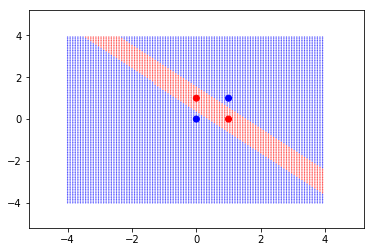

In [85]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.scatter(Colors[:,0],Colors[:,1],c=['red' if np.round(i)==1 else 'blue' for i in Colors_y], s=0.1)
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [86]:
sess.close()

# Entrena una red neuronal para identificar los putnos al interior de un circulo

In [89]:
n=20.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

X=np.asarray(rok)
Y=[]
for x in rok:
    i=0
    for s in x:
        i=i+s**2
    if i<=4:
        Y.append([0])
    else:
        Y.append([1])
Y=np.asarray(Y)
X=np.asarray(X)

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

Colors=np.asarray(rok)

In [90]:
len(Y)

400

[[ 0.7238847]]
[[-3.11339474]
 [-0.53268403]]
Accuracy: 
0.8075


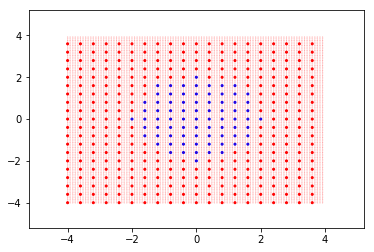

[[ 0.54888302]]
[[-2.4363234   2.42871547]
 [-0.43487594 -0.43839836]]
Accuracy: 
0.8


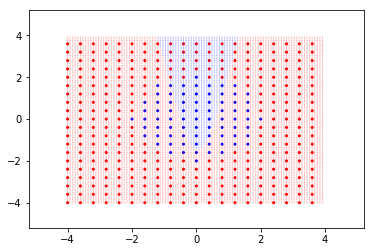

[[ 0.02825475]]
[[-1.40109193 -0.57857519  2.09666324]
 [-1.40172136  2.10448813 -0.57196218]]
Accuracy: 
0.9725


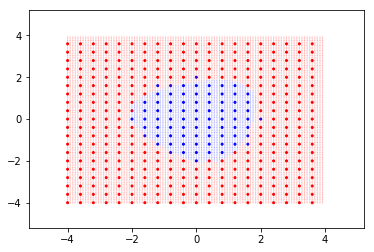

[[ 0.01508024]]
[[ 0.74996823 -0.67135602 -2.98322392  1.94410658]
 [-2.02315903 -2.13137531 -0.34368747 -0.04819404]]
Accuracy: 
0.9825


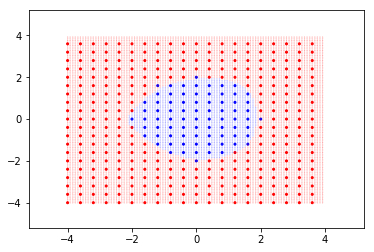

[[ 0.01206701]]
[[-2.62308526  0.37054086  0.38874516  2.16930771 -0.0943418 ]
 [-0.46110523  1.11417603  3.682868   -0.57430762  2.2259984 ]]
Accuracy: 
0.9875


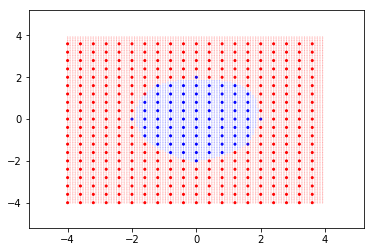

[[ 0.00406176]]
[[-1.12605298  3.32347155 -1.84071803 -0.58877742  2.594311   -0.73931265]
 [ 0.09886903  0.33029521 -2.19484091 -2.78283763 -0.8346191   2.29134965]]
Accuracy: 
0.985


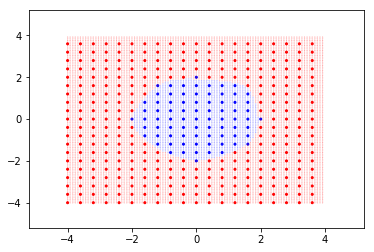

[[ 0.00688815]]
[[-0.23911841 -3.39732814 -3.45863128 -1.58376098  1.07646334  0.85104239
  -0.11918966]
 [ 3.10037112 -0.2984843  -0.02577222  0.18093579  0.15982273 -1.41565216
  -3.31327033]]
Accuracy: 
0.985


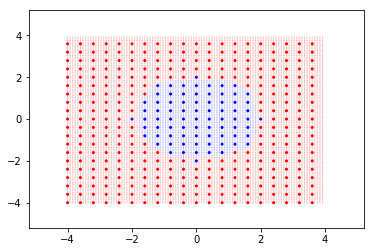

[[ 0.00141235]]
[[ 0.78999889 -1.08741331  2.68754792 -1.37553775  1.75711095 -1.97725606
   0.04473254 -2.98190689]
 [-2.35970879  2.77991152  0.60830998 -2.29668689  1.73569489  0.50710362
   0.46177143  0.87404823]]
Accuracy: 
0.9875


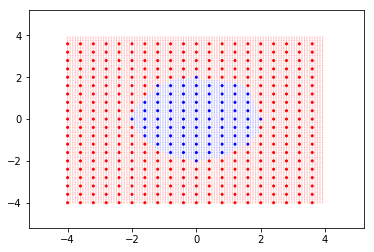

[[ 0.00190218]]
[[ 0.13708092  2.2031045  -0.45250571 -2.45924258 -2.74596977  0.01112652
   2.63862681  0.29570538  1.12875974]
 [ 2.75391221 -0.89228177 -3.26418591 -1.16482043 -0.8507334  -0.02704239
  -1.24526525  0.64852524 -2.06931353]]
Accuracy: 
0.9925


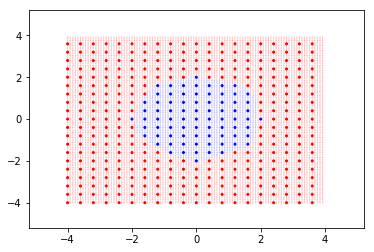

In [92]:
accuracies=[]
input_size=2
for mid in [1,2,3,4,5, 6, 7, 8, 9]:
    middle_size=mid
    output_layer_size=1
    #Los placeholders son para los datos de entrada
    x = tf.placeholder(tf.float32, [None, input_size])
    y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
    #La variables para lo que se va a ir calculando y modificando en el camino
    W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
    W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
    b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
    b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")
    y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
    #lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
    # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    sess.run(init)
    for i in range(2000):
      sess.run(train_step, feed_dict={x: X, y_: Y})
    #imprimir alguna variable
    print(sess.run(y, feed_dict={x:[[1,0]]}))
    print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
    Colors_y=sess.run(y, feed_dict={x:Colors})
    correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracies.append(sess.run(accuracy, feed_dict={x: X, y_: Y}))
    print("Accuracy: ")
    print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos
    plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y], s=4)
    plt.scatter(Colors[:,0],Colors[:,1],c=['red' if np.round(i)==1 else 'blue' for i in Colors_y], s=0.015)
    x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
    plt.ylim([-5.2,5.2])
    plt.xlim([-5.2,5.2])
    plt.show()
    plt.clf()
    sess.close()